# Alzheimer's Prediction (Multi-Class) - Encoding


### Variable Descriptions
* `directory.id`	Id assigned to imaging directories. Not from LONi data
* `Subject (PTID)`	Participant ID
* `RID`	Participant roster ID
* `Image.Data.ID`	MRI ID
* `Modality`	Image type
* `Visit`	1=screening scan
* `Acq.Date`	MRI date
* `DX.bl`	Diagnosis at baseline
* `EXAMDATE`	Examination Date
* `AGE`	    Age at baseline
* `PTGENDER`	Sex
* `PTEDUCAT`	Years of Education
* `PTETHCAT`	Ethnicity
* `PTRACCAT`	Race
* `APOE4`	APOE4 genotype
* `MMSE`	MMSE score on cognitive test
* `imputed_genotype`	Challenge specific designation, TRUE=has imputed genotypes
* `APOE Genotype`	APOE allele 1 and allele 2 genotypes
* `Dx Codes for Submission`	The LMCI in the ADNI data is equivalent to MCI in test. This column just converts LMCI->MCI

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import os

In [2]:
#Read data
dat = pd.read_csv('AD_Challenge_Training_Data_Clinical_Updated_7.22.2014/ADNI_Training_Q3_APOE_CollectionADNI1Complete 1Yr 1.5T_July22.2014.csv')

#Check NA values, 1 NA for imputed_genotype
# dat.isnull().sum()

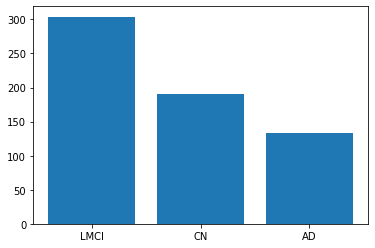

In [8]:
plt.bar(Y.value_counts().index, Y.value_counts())
plt.show()

### Convert Categorical Variables to 1-Hot
* Next time use `sklearn.preprocessing.OneHotEncoder`

In [9]:
#for each categorical var, convert to 1-hot encoding
for var in cat_vars:
    print('Converting', var, 'to 1-hot encoding')
    
    #get 1-hot and replace original column with the >= 2 categories as columns
    one_hot_df = pd.get_dummies(X[var])
    X = pd.concat([X, one_hot_df], axis=1)
    X = X.drop(var, axis=1)
    
X.head(4)

Converting imputed_genotype to 1-hot encoding
Converting APOE Genotype to 1-hot encoding
Converting PTGENDER to 1-hot encoding
Converting APOE4 to 1-hot encoding
Converting PTETHCAT to 1-hot encoding
Converting PTRACCAT to 1-hot encoding


,AGE,PTEDUCAT,MMSE,False,True,"2,2","2,3","2,4","3,3","3,4",...,Male,0,1,2,Hisp/Latino,Not Hisp/Latino,Unknown,Asian,Black,White
0,81.3,18,20,0,1,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
1,67.5,10,27,1,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,1
2,73.7,16,29,0,1,0,0,0,1,0,...,1,1,0,0,0,1,0,0,0,1
3,80.4,13,25,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


### Remember:
* PTGENDER: (Male, Female)
* PTETHCAT: (Hisp/Latino, Not Hisp/Latino, Unknown)
* PTRACCAT: (White, Black, Asian)
* APOE4: (0, 1, 2)
* APOE4 Genotype: (22, 23, 24, 33, 34, 44)
* imputed_genotype (True, False)

## Logistic Regression before encoding

In [12]:
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import cross_val_score

In [13]:
log_clf = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000000, multi_class='multinomial')
print('Validation Accuracy = ', format(cross_val_score(log_clf, X_train, y_train, cv=5).mean(), '.2%'))

Validation Accuracy =  69.05%


## Model Selection

### Choosing Logistic Regression
* `Validation Score = .69` - unable to take advantage of more complex models, likely due to small data set size

### Test Logistic Regression Model
* `Test Score = .746` - take with a grain of salt since validation score was `.69`

## Logistic Regression after encoding

In [20]:
log_clf.fit(X_train, y_train)

log_clf_preds = log_clf.predict(X_test)
    
log_clf_accuracy = (log_clf_preds == y_test)
print('Test Accuracy =', format( np.sum(log_clf_accuracy)/num_test, '.2%'))

Test Accuracy = 74.60%


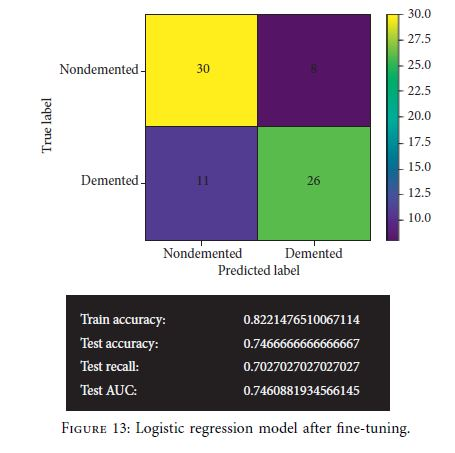